<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

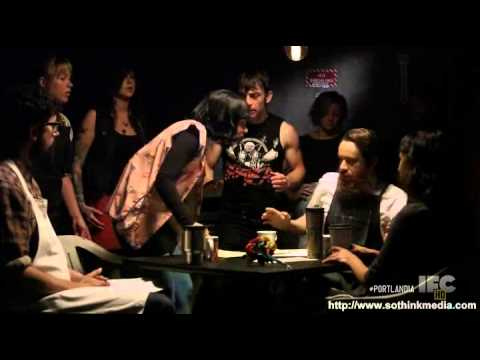

In [229]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [230]:
%pwd

'/Users/elliotgunn/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [231]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [232]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [233]:
def wrangle(df):
    
    X = df.copy()
        
    # extract date
    X['date'] = X['full_review_text'].apply(lambda x: x.split()[0])
    
    # convert date to datetime format
    X['date'] = pd.to_datetime(X['date'], infer_datetime_format=True)
    # extract components
    X['year'] = X['date'].dt.year
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    
    # star rating digits only
    X['stars'] = X['star_rating'].apply(lambda x: x.split()[0])
    X['stars'] = X['stars'].astype(float)
    
    # strip()
    for row in X['coffee_shop_name']:
        row.strip()
    
    # review text only
    X['review_text'] = X['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

    # remove puncutation
    X['review_text'] = X['review_text'].str.replace('[^\w\s]','')

    
    X = X.drop(columns=["full_review_text", "date", "star_rating"])
    
    return X
    
shops_clean = wrangle(shops)
shops_clean.head()

,coffee_shop_name,year,month,day,stars,review_text
0,The Factory - Cafe With a Soul,2016,11,25,5.0,1 checkin Love love loved the atmosphere Every...
1,The Factory - Cafe With a Soul,2016,12,2,4.0,Listed in Date Night Austin Ambiance in Austin...
2,The Factory - Cafe With a Soul,2016,11,30,4.0,1 checkin Listed in Brunch Spots I loved the e...
3,The Factory - Cafe With a Soul,2016,11,25,2.0,Very cool decor Good drinks Nice seating Howev...
4,The Factory - Cafe With a Soul,2016,12,3,4.0,1 checkin They are located within the Northcro...


In [234]:
shops_clean['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
Caffé Medici                            143
Apanas Coffee & Beer                    136
Kick Butt Coffee Music & Booze          100
Bennu Coffee                            100
Sorrento’s Coffee                       100
TOMS                                    100
Monkey Nest Coffee                      100
Hot Mama’s Cafe                         100
Cherrywood Coffeehouse                  100
Dominican Joe                           100
Tea Haus                                100
Lola Savannah Coffee Lounge             100
Patika                                  100
The Steeping Room                       100
Alta’s Cafe                             100
Picnik Austin                           100
Russell’s Bakery                        100
Sa-Ten                          

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Overall word/token count

In [278]:
import spacy

nlp = spacy.load("en_core_web_sm")

#### Lemmatization

- transforms a word into its base form called a lemma
- e.g. plurals get transformed to singular tense
- computationally costly
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [279]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas



In [280]:
shops_clean['tokens'] = shops_clean['review_text'].apply(get_lemmas)
shops_clean['tokens'].head()

0    [1, checkin, love, love, love, atmosphere, eve...
1    [list, date, night, austin, ambiance, austin, ...
2    [1, checkin, listed, brunch, spots, love, ecle...
3    [very, cool, decor, good, drink, nice, seating...
4    [1, checkin, locate, northcross, mall, shoppin...
Name: tokens, dtype: object

In [281]:
from collections import Counter

def count(docs):
        '''
        This function takes documents and 
        returns a dataframe of word counts
        for analysis.
        
        '''

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [282]:
# top 5 words
wc = count(shops_clean['tokens'])
wc.head(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,coffee,4919,10565,1.0,0.026448,0.026448,0.645877
69,the,3948,6916,2.0,0.017313,0.043762,0.518382
118,place,3878,6022,3.0,0.015075,0.058837,0.509191
162,good,3793,5873,4.0,0.014702,0.073539,0.498030
109,not,3332,5738,5.0,0.014364,0.087904,0.437500


In [283]:
wc.shape

(17361, 7)

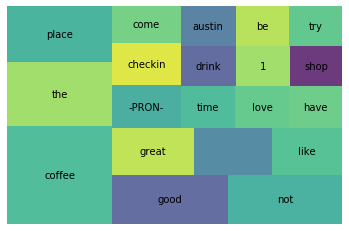

In [284]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### View counts by rating

In [285]:
# look at shops with ratings 1-3

shops_clean['stars'] = shops_clean['stars'].astype(float)

# create mask and verify
mask_bad = shops_clean['stars'] < 4.0
shops_clean[mask_bad].stars.value_counts()

3.0    738
2.0    460
1.0    278
Name: stars, dtype: int64

In [288]:
wc_bad = count(shops_clean[mask_bad]['tokens'])
wc_bad.shape

(7703, 7)

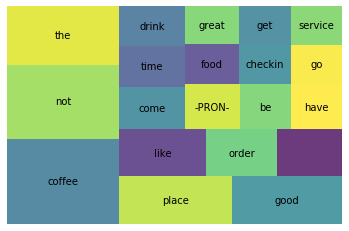

In [290]:
# words most popularly used for bad coffee shops
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

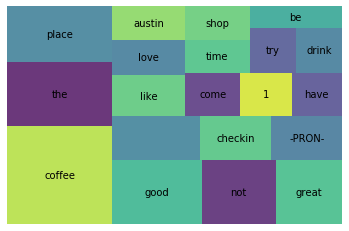

In [291]:
# look at shops with ratings 4 or 5

mask_good = shops_clean['stars'] > 3.0
wc_good = count(shops_clean[mask_good]['tokens'])

wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [292]:
# we need the 'appears_in_pct' from the good and bad tables
# create a dataframe with 'word', 'appears_in_pct_good', 'appears_in_pct_bad'

# merge wc_good, wc_bad
df = pd.merge(wc_good, wc_bad, on='word')
df.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,coffee,3971,8400,1.0,0.026971,0.026971,0.646743,948,2165,1.0,0.024598,0.024598,0.642276
1,the,3136,5438,2.0,0.017461,0.044432,0.510749,812,1478,3.0,0.016792,0.062716,0.550136
2,place,3124,4795,3.0,0.015396,0.059828,0.508795,754,1227,4.0,0.013941,0.076657,0.510840
3,good,3075,4681,4.0,0.015030,0.074858,0.500814,718,1192,5.0,0.013543,0.090200,0.486450
4,not,2401,3861,5.0,0.012397,0.087255,0.391042,931,1877,2.0,0.021326,0.045923,0.630759


In [293]:
df = df.iloc[:, [0, 6, 12]]
df.head()

,word,appears_in_pct_x,appears_in_pct_y
0,coffee,0.646743,0.642276
1,the,0.510749,0.550136
2,place,0.508795,0.510840
3,good,0.500814,0.486450
4,not,0.391042,0.630759


In [294]:
df = df.rename(columns={'appears_in_pct_x': "appears_in_pct_good", 'appears_in_pct_y': "appears_in_pct_bad"})
df.head()

,word,appears_in_pct_good,appears_in_pct_bad
0,coffee,0.646743,0.642276
1,the,0.510749,0.550136
2,place,0.508795,0.510840
3,good,0.500814,0.486450
4,not,0.391042,0.630759


In [295]:
# Only look at the top 5-10 words with the greatest differences

df['differences'] = abs(df['appears_in_pct_good'] - df['appears_in_pct_bad'])
df.head()

,word,appears_in_pct_good,appears_in_pct_bad,differences
0,coffee,0.646743,0.642276,0.004466
1,the,0.510749,0.550136,0.039386
2,place,0.508795,0.510840,0.002045
3,good,0.500814,0.486450,0.014364
4,not,0.391042,0.630759,0.239716


In [296]:
# top 10 by differences
df.sort_values(by='differences', ascending=False)

,word,appears_in_pct_good,appears_in_pct_bad,differences
4,not,0.391042,0.630759,0.239716
5,great,0.407818,0.235772,0.172045
28,delicious,0.191857,0.056233,0.135624
27,order,0.164332,0.294038,0.129706
9,like,0.271336,0.399051,0.127716
10,love,0.261238,0.142276,0.118961
22,friendly,0.231270,0.122629,0.108642
7,checkin,0.410749,0.310298,0.100451
155,ask,0.050651,0.149051,0.098400
40,service,0.140391,0.234417,0.094026


# Presentation: Strange Brew, Austin Coffee

Your TA will provide you the name of the coffee shop you should analyze. That coffeeshop will have reviews in the dataset provided with today's assignment.
Imagine you are a consultant that your assigned coffee shop has hired to provide recommendations on how improve their Yelp rating. You will present your recommendations to your TL (coffeeshop owner/manager) tomorrow during your 1:1. Give  your recommendations in a 3-5 slide presentation with supporting graphs and analysis. Here are a couple suggested questions to address in your presentation:
1. How is the coffee shop doing overall (in terms of Yelp reviews)?
2. What is the coffee shop doing well? - How does that compare to competitors?
3. What is the coffee shop not doing well? - How does that compare to competitors?
4. What are the recommendations for improving? (Summary / Conclusion)
- Try to address one question for a number above.
- Make sure to include plenty of charts & graphs :chart_with_upwards_trend: :bar_chart:
- Include a title slide the the name of your coffeeshop and your name (and a presentation title)
- Try to keep your presentation under 8 minutes.

In [297]:
#df1 = shops_clean[shops_clean['coffee_shop_name'] == "Strange Brew, Austin Coffee"]
#df1.shape

In [298]:
austin = shops_clean[shops_clean['coffee_shop_name'].str.contains("Strange")]

In [299]:
austin['coffee_shop_name'].value_counts()

Strange Brew, Austin Coffee     100
Name: coffee_shop_name, dtype: int64

//anaconda3/envs/U4-S1-NLP-DS6/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


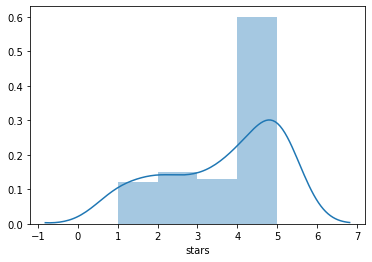

In [300]:
# How is the coffee shop doing?
import seaborn as sns

ax = sns.distplot(austin['stars']);

//anaconda3/envs/U4-S1-NLP-DS6/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


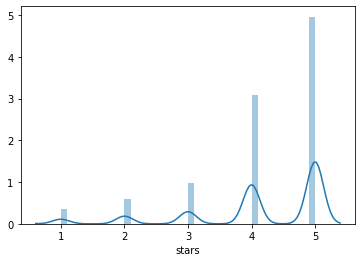

In [308]:
ax = sns.distplot(shops_clean['stars']);

In [302]:
austin['stars'].value_counts(normalize=True)

5.0    0.39
4.0    0.21
2.0    0.15
3.0    0.13
1.0    0.12
Name: stars, dtype: float64

In [303]:
austin['year'].value_counts(normalize=True)

2016    0.48
2015    0.34
2014    0.13
2013    0.03
2012    0.02
Name: year, dtype: float64

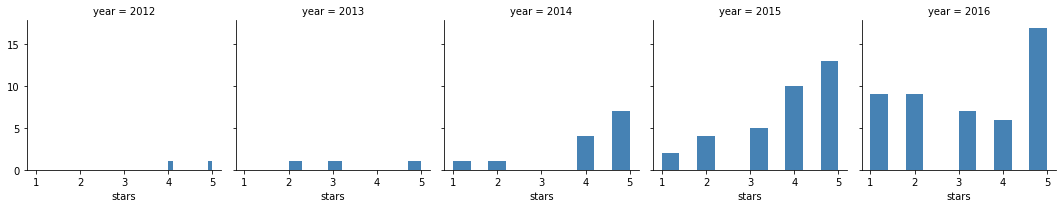

In [304]:
import numpy as np
g = sns.FacetGrid(austin, col="year", margin_titles=True)
g.map(plt.hist, "stars", color="steelblue");

In [305]:
austin['tokens'] = austin['review_text'].apply(get_lemmas)
austin['tokens'].head()

//anaconda3/envs/U4-S1-NLP-DS6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


6372    [1, checkin, with, great, coffee, drink, googl...
6373    [have, twice, work, the, coffee, not, bad, the...
6374    [whether, study, hang, listen, live, music, co...
6375    [one, staff, scold, embarrass, guy, sit, loung...
6376    [1, checkin, reviewing, coffee, house, aspect,...
Name: tokens, dtype: object

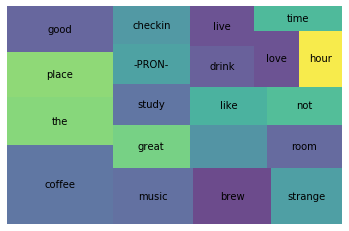

In [306]:
mask_good = austin['stars'] > 3.0
wc_good = count(austin[mask_good]['tokens'])

wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

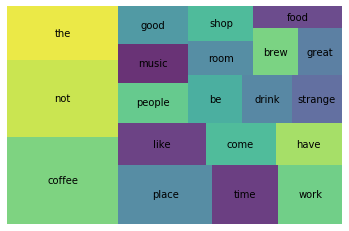

In [310]:
mask_bad = austin['stars'] < 4.0
wc_bad = count(austin[mask_bad]['tokens'])

wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [315]:
# we need the 'appears_in_pct' from the good and bad tables
# create a dataframe with 'word', 'appears_in_pct_good', 'appears_in_pct_bad'

# merge wc_good, wc_bad
df = pd.merge(wc_good, wc_bad, on='word')
df = df.iloc[:, [0, 6, 12]]
df = df.rename(columns={'appears_in_pct_x': "appears_in_pct_good", 'appears_in_pct_y': "appears_in_pct_bad"})
df.head(10)

,word,appears_in_pct_good,appears_in_pct_bad
0,coffee,0.783333,0.775
1,the,0.383333,0.500
2,place,0.566667,0.600
3,good,0.500000,0.300
4,music,0.466667,0.225
5,brew,0.483333,0.225
6,strange,0.416667,0.225
7,great,0.433333,0.275
8,,0.233333,0.225
9,room,0.366667,0.200


In [316]:
df['differences'] = (df['appears_in_pct_good'] - df['appears_in_pct_bad'])
df.sort_values(by='differences', ascending=False)

,word,appears_in_pct_good,appears_in_pct_bad,differences
12,checkin,0.533333,0.250,0.283333
5,brew,0.483333,0.225,0.258333
4,music,0.466667,0.225,0.241667
10,study,0.333333,0.125,0.208333
3,good,0.500000,0.300,0.200000
28,space,0.216667,0.025,0.191667
6,strange,0.416667,0.225,0.191667
11,-PRON-,0.366667,0.175,0.191667
16,live,0.300000,0.125,0.175000
29,friendly,0.266667,0.100,0.166667


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

